In [ ]:
!pip install split-folders
import splitfolders

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models, optimizers

In [ ]:
image_size = (224, 224)
batch_size = 16

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
input_folder = '/content/drive/MyDrive/MyWork/6-МНК/DATASET'
splitfolders.ratio(input_folder, output="/content",
                   seed=42, ratio=(.8, .1, .1),
                   group_prefix=None) # default values
train_generator = train_datagen.flow_from_directory('/content/train',
                                                    target_size=image_size[:2],
                                                    color_mode='rgb',
                                                    batch_size=batch_size,
                                                    class_mode='categorical')
valid_datagen = ImageDataGenerator(rescale=1./255)
valid_generator = valid_datagen.flow_from_directory('/content/val',
                                                    target_size=image_size[:2],
                                                    color_mode='rgb',
                                                    batch_size=batch_size,
                                                    class_mode='categorical')

Copying files: 1097 files [00:39, 27.75 files/s] 

Found 876 images belonging to 3 classes.
Found 109 images belonging to 3 classes.


In [ ]:
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

base_model.trainable = False

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(3, activation='softmax')
])

model.compile(
    optimizer=optimizers.Adam(learning_rate = 1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

9406464/9406464 [==============================] - 0s 0us/step


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   
 tional)                                                         
                                                                 
 global_average_pooling2d (  (None, 1280)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 128)               163968    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 3)                 387       
                                                                 
Total params: 2422339 (9.24 MB)
Trainable params: 164355

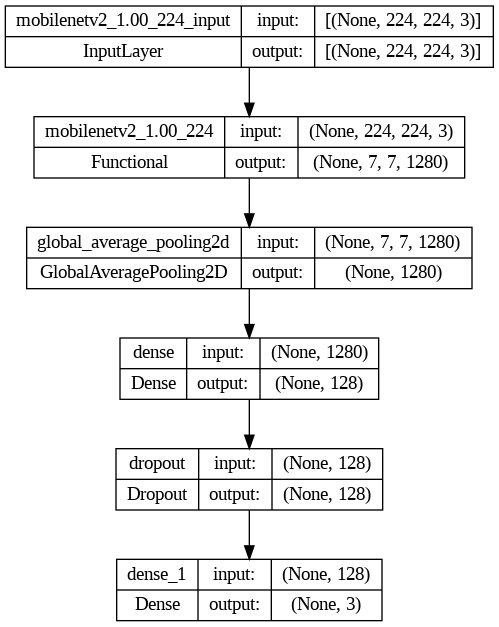

In [ ]:
from keras.utils import plot_model

plot_model(model, to_file='model_basel_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=valid_generator
)

Epoch 1/20
55/55 [==============================] - 54s 885ms/step - loss: 0.9234 - accuracy: 0.6153 - val_loss: 0.6106 - val_accuracy: 0.7982
Epoch 2/20
55/55 [==============================] - 47s 849ms/step - loss: 0.5836 - accuracy: 0.7808 - val_loss: 0.4757 - val_accuracy: 0.8165
Epoch 3/20
55/55 [==============================] - 46s 810ms/step - loss: 0.4741 - accuracy: 0.8174 - val_loss: 0.4248 - val_accuracy: 0.8349
Epoch 4/20
55/55 [==============================] - 43s 782ms/step - loss: 0.4517 - accuracy: 0.8174 - val_loss: 0.3825 - val_accuracy: 0.8807
Epoch 5/20
55/55 [==============================] - 43s 778ms/step - loss: 0.4107 - accuracy: 0.8311 - val_loss: 0.3629 - val_accuracy: 0.8807
Epoch 6/20
55/55 [==============================] - 43s 775ms/step - loss: 0.3848 - accuracy: 0.8470 - val_loss: 0.3514 - val_accuracy: 0.8807
Epoch 7/20
55/55 [==============================] - 41s 734ms/step - loss: 0.3599 - accuracy: 0.8630 - val_loss: 0.3707 - val_accuracy: 0.8716

In [ ]:
model.save('/content/drive/MyDrive/MyWork/6-МНК/MobileNetV2.keras')

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

val_preds = model.predict(valid_generator)
val_preds_classes = np.argmax(val_preds, axis=1)
true_classes = valid_generator.classes

conf_mat = confusion_matrix(true_classes, val_preds_classes)
class_report = classification_report(true_classes, val_preds_classes)

print("Confusion Matrix:")
print(conf_mat)
print("\nClassification Report:")
print(class_report)

7/7 [==============================] - 4s 463ms/step
Confusion Matrix:
[[ 0  4  8]
 [ 2 32 22]
 [ 1 19 21]]

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.58      0.57      0.58        56
           2       0.41      0.51      0.46        41

    accuracy                           0.49       109
   macro avg       0.33      0.36      0.34       109
weighted avg       0.45      0.49      0.47       109



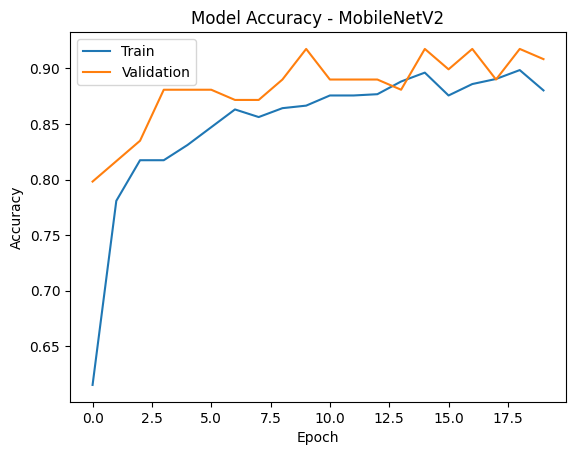

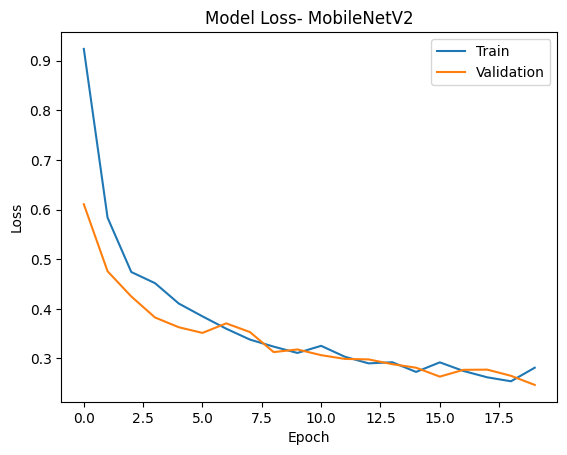

In [ ]:
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy - MobileNetV2')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model Loss- MobileNetV2')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [ ]:
history.history['val_accuracy']

[0.7981651425361633,
 0.8165137767791748,
 0.8348624110221863,
 0.8807339668273926,
 0.8807339668273926,
 0.8807339668273926,
 0.8715596199035645,
 0.8715596199035645,
 0.8899082541465759,
 0.9174311757087708,
 0.8899082541465759,
 0.8899082541465759,
 0.8899082541465759,
 0.8807339668273926,
 0.9174311757087708,
 0.8990825414657593,
 0.9174311757087708,
 0.8899082541465759,
 0.9174311757087708,
 0.9082568883895874]

In [ ]:
history.history['val_loss']

[0.6106199026107788,
 0.4756542146205902,
 0.42481768131256104,
 0.38250285387039185,
 0.36286085844039917,
 0.3514379858970642,
 0.3706653416156769,
 0.353179007768631,
 0.31279537081718445,
 0.31812331080436707,
 0.3066382110118866,
 0.2990781366825104,
 0.2980864644050598,
 0.28843972086906433,
 0.2813784182071686,
 0.26341620087623596,
 0.27711033821105957,
 0.2774771451950073,
 0.2650698125362396,
 0.24669811129570007]